In [1]:
!pwd

D:\Users\drome\gitrepos\spe 06\MannvilleGroup_Strat_Hackathon


In [234]:
import os
import glob
import lasio
lasio.__version__
import pandas as pd
import numpy as np
import geopandas
from functools import reduce
import welly
welly.__version__
from welly import Well
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
home = "./SPE_006_originalData/OilSandsDB"

In [38]:
picks_dicts = pd.read_table(home + "/PICKS_DIC.TXT", delimiter='\t')
picks_dicts.head()

,HorID,Descriptopn
0,1000,mannville
1,2000,t61
2,3000,t51
3,4000,t41
4,5000,t31


In [39]:
picks = pd.read_table(home + "/PICKS.TXT", delimiter='\t')
picks.head()

,SitID,HorID,Pick,Quality
0,102496,1000,321,1
1,102496,2000,,-1
2,102496,3000,,-1
3,102496,4000,,-1
4,102496,5000,438,2


In [146]:
wellst = pd.read_table(home + "/WELLS.TXT", delimiter= '\t')
wellst.head()

,SitID,UWI (AGS),UWI
0,102496,0674010812000,00/12-08-067-01W4/0
1,102497,0674020807000,00/07-08-067-02W4/0
2,102498,0674021109000,00/09-11-067-02W4/0
3,102500,0674022910000,00/10-29-067-02W4/0
4,102501,0674023406000,00/06-34-067-02W4/0


In [147]:
wellst.tail()

,SitID,UWI (AGS),UWI
2188,126239,1014133011AA0,AA/11-30-101-13W4/0
2189,126240,1014140811AA0,AA/11-08-101-14W4/0
2190,126241,1014141414AA0,AA/14-14-101-14W4/0
2191,126243,1014142906AA0,AA/06-29-101-14W4/0
2192,126244,1014143506AA0,AA/06-35-101-14W4/0


In [339]:
wellst.iloc[2192].UWI[9:12] + "-" + wellst.iloc[2192].UWI[16:17] + "-" + wellst.iloc[2192].UWI[13:15] + "-" + \
wellst.iloc[2192].UWI[6:8] + "-" + wellst.iloc[2192].UWI[3:5] + "-" + wellst.iloc[2192].UWI[0:2] + "-" + \
wellst.iloc[2192].UWI[18:19]

'101-4-14-35-06-AA-0'

In [47]:
# las files
path_logs = home + "/Logs"
las = [x for x in os.listdir(path_logs + "/") if x.endswith(".LAS")]
print("# LAS files: " + str(len(las)))

# LAS files: 2171


In [ ]:
wellname = 'AB-07-12-093-10W4-0'
lasio.read(path_logs + "/" + wellname + ".LAS").df()

### Reading LAS Files with lasio

In [ ]:
las = [lasio.read(path_logs + "/" + filename) for filename in os.listdir(path_logs) if filename.endswith(".LAS")]
type(las)

### Reading LAS Files with welly

In [189]:
# from welly import Well
wells_las = [Well.from_las(path_logs + "/" + file) for file in os.listdir(path_logs) if file.endswith(".LAS")]

Header section Parameter regexp=~P was not found.


In [287]:
type(wells_las[0])

welly.well.Well

In [286]:
w = wells_las[2153]
type(w)

welly.well.Well

In [338]:
las[2153].header['Well']

[HeaderItem(mnemonic=WELL, unit=, value=AMOCO AOSTRA GLISPLH1, descr=Well_nam...),
 HeaderItem(mnemonic=LOC, unit=, value=AB/05-02-086-07W4/0, descr=Location   ...),
 HeaderItem(mnemonic=UWI, unit=, value=AB/05-02-086-07W400, descr=Uwi        ...),
 HeaderItem(mnemonic=ENTR, unit=, value=KATHY, descr=Entered      - ENTERED BY),
 HeaderItem(mnemonic=SRVC, unit=, value=SCHLUMBERGER, descr=Scn          - SE...),
 HeaderItem(mnemonic=STRT, unit=M, value=160, descr=top_depth    - START DEPTH),
 HeaderItem(mnemonic=STOP, unit=M, value=235.001, descr=bot_depth    - STOP D...),
 HeaderItem(mnemonic=STEP, unit=M, value=0.3, descr=increment    - STEP LENGTH),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=NULL Value)]

In [332]:
las[2153].header['Parameter']

[HeaderItem(mnemonic=GL, unit=M, value=478.6, descr=gl           - GROUND LEV...),
 HeaderItem(mnemonic=EREF, unit=M, value=480, descr=kb           - ELEVATION ...),
 HeaderItem(mnemonic=DATM, unit=M, value=480, descr=datum        - DATUM ELEV...),
 HeaderItem(mnemonic=TDD, unit=M, value=241, descr=tdd          - TOTAL DEPTH...),
 HeaderItem(mnemonic=RUN, unit=, value=ONE, descr=Run          - RUN NUMBER),
 HeaderItem(mnemonic=ENG, unit=, value=BILL, descr=Engineer     - RECORDING E...),
 HeaderItem(mnemonic=WIT, unit=, value=JIM, descr=Witness      - WITNESSED BY),
 HeaderItem(mnemonic=MUD, unit=, value=GEL, descr=Mud_type     - MUD TYPE),
 HeaderItem(mnemonic=MATR:1, unit=, value=LIMESTONE, descr=Logunit      - NEU...),
 HeaderItem(mnemonic=TMAX, unit=C, value=60, descr=BHT          - MAXIMUM REC...),
 HeaderItem(mnemonic=BHTD, unit=M, value=241, descr=BHTDEP       - MAXIMUM RE...),
 HeaderItem(mnemonic=MATR:2, unit=, value=1, descr=LOGUNIT      - NEUTRON MATRIX),
 HeaderItem(mnemoni

In [291]:
las[2153].header['Version']

[HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS LOG ASCII STANDARD -V...),
 HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=ONE LINE PER DEPTH STEP)]

In [299]:
las[2153].header['Curves']

[CurveItem(mnemonic=DEPT, unit=M, value=00 001 00 00, descr=DEPTH        - DEPTH, original_mnemonic=DEPT, data.shape=(251,)),
 CurveItem(mnemonic=GR:1, unit=API, value=00 310 00 00, descr=GR           - GAMMA RAY, original_mnemonic=GR, data.shape=(251,)),
 CurveItem(mnemonic=DPHI:1, unit=V/V, value=00 890 00 00, descr=PHID         - DENSITY POROSITY (LIMESTONE), original_mnemonic=DPHI, data.shape=(251,)),
 CurveItem(mnemonic=ILD:1, unit=OHMM, value=00 120 00 00, descr=RESD         - DEEP RESISTIVITY (DIL), original_mnemonic=ILD, data.shape=(251,)),
 CurveItem(mnemonic=GR:2, unit=API, value=00 310 00 00, descr=GR           - GAMMA RAY, original_mnemonic=GR, data.shape=(251,)),
 CurveItem(mnemonic=DPHI:2, unit=V/V, value=00 890 00 00, descr=PHID         - DENSITY POROSITY (LIMESTONE), original_mnemonic=DPHI, data.shape=(251,)),
 CurveItem(mnemonic=ILD:2, unit=OHMM, value=00 120 00 00, descr=RESD         - DEEP RESISTIVITY (DIL), original_mnemonic=ILD, data.shape=(251,))]

In [305]:
las[2153].header['Curves']['DEPT'].data

array([ 160.   ,  160.3  ,  160.6  ,  160.9  ,  161.2  ,  161.5  ,
        161.8  ,  162.1  ,  162.4  ,  162.7  ,  163.   ,  163.3  ,
        163.6  ,  163.9  ,  164.2  ,  164.5  ,  164.8  ,  165.1  ,
        165.4  ,  165.7  ,  166.   ,  166.3  ,  166.6  ,  166.9  ,
        167.2  ,  167.5  ,  167.8  ,  168.1  ,  168.4  ,  168.7  ,
        169.   ,  169.3  ,  169.6  ,  169.9  ,  170.2  ,  170.5  ,
        170.8  ,  171.1  ,  171.4  ,  171.7  ,  172.   ,  172.3  ,
        172.6  ,  172.9  ,  173.2  ,  173.5  ,  173.8  ,  174.1  ,
        174.4  ,  174.7  ,  175.   ,  175.3  ,  175.6  ,  175.9  ,
        176.2  ,  176.5  ,  176.8  ,  177.1  ,  177.4  ,  177.7  ,
        178.   ,  178.3  ,  178.6  ,  178.9  ,  179.2  ,  179.5  ,
        179.8  ,  180.1  ,  180.4  ,  180.7  ,  181.   ,  181.3  ,
        181.6  ,  181.9  ,  182.2  ,  182.5  ,  182.8  ,  183.1  ,
        183.4  ,  183.7  ,  184.   ,  184.3  ,  184.6  ,  184.9  ,
        185.2  ,  185.5  ,  185.8  ,  186.1  ,  186.4  ,  186.

In [326]:
las[2153].header['Curves'].keys()

['DEPT', 'GR:1', 'DPHI:1', 'ILD:1', 'GR:2', 'DPHI:2', 'ILD:2']

In [209]:
wells_las[2153].location.location, wells_las[2153].location.td, wells_las[2153].location.tdd

('AB/05-02-086-07W4/0', 241, 241)

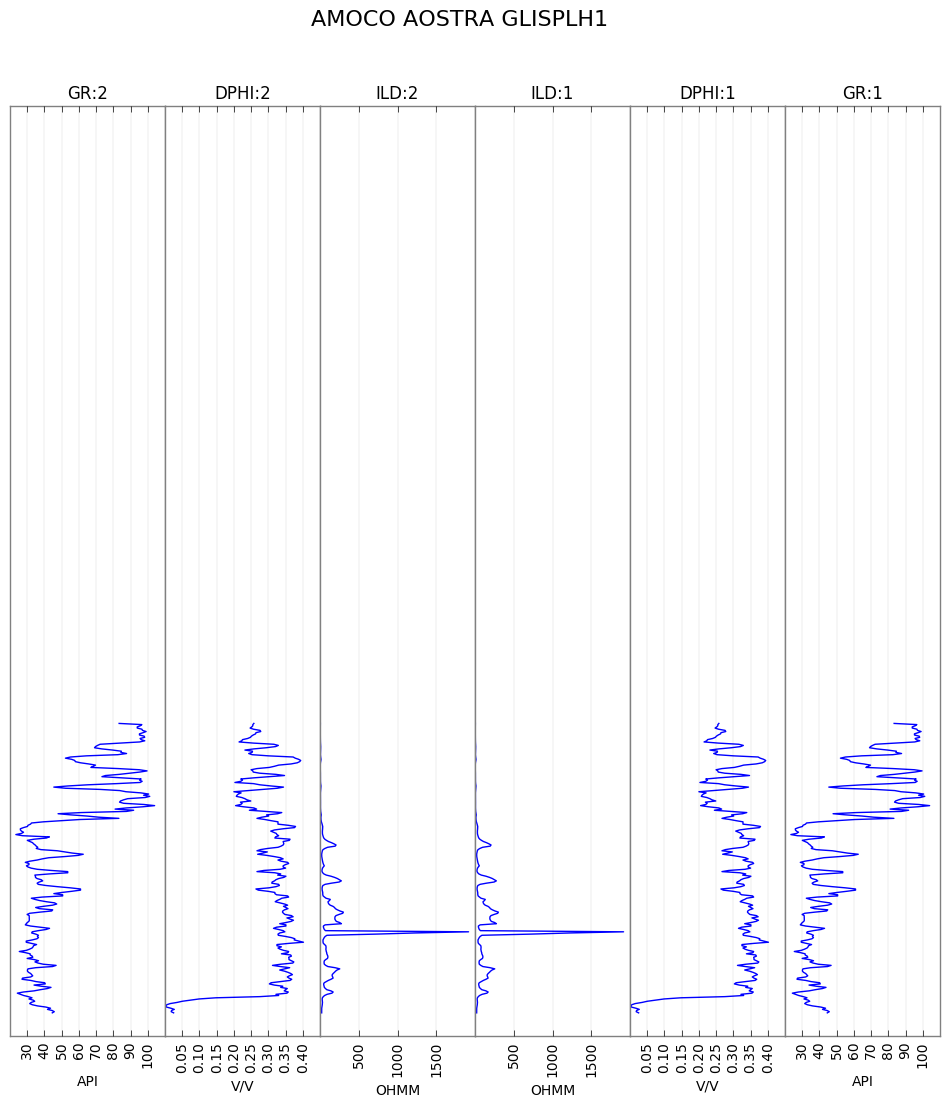

In [232]:
wells_las[2153].plot()

In [210]:
range(len(wells_las))

range(0, 2171)

In [ ]:
# d = [x.data.keys() for x in wells] # list(d.items())
# d
# pd.DataFrame(d)
# pd.DataFrame(d).to_csv('curves.csv', sep='\t')

In [ ]:
# [x.data.keys() for x in wells]

In [176]:
# function to retrieve UWI which location may vary within LAS file
keywds = ['UWI', 'UWI:1', 'UWI:2', 'UWI:3']
def getKeyValue(idx, keywds):
    for keywd in keywds:
        if (keywd) not in las[idx].header["Well"]:
            pass
        else:
            return las[idx].header["Well"][keywd].value

In [177]:
# counting more common curves
curves = []
for i in range(len(las)):
    df_las = las[i].df()
    curves.extend(list(df_las.columns))

In [ ]:
# print all possible curves in the dataset, independent if they are repeated with an index :1, :2
print(curves)

In [186]:
import collections
counter = collections.Counter(curves)
print(counter.keys())
print(counter.values())

dict_keys(['RHOB', 'NPHI', 'ILD:1', 'IL', 'SFLU', 'RT', 'LLD', 'LLS', 'LITH', 'DPHI:2', 'PHIN', 'GR:1', 'SN', 'PHID', 'DPHI', 'DELT', 'ILD', 'ILM', 'SNP', 'SFL', 'COND', 'DPHI:1', 'DT', 'RESD', 'GR:2', 'DENS', 'GR', 'SP', 'ILD:2', 'CALI'])
dict_values([132, 2008, 1, 2, 6, 1, 2, 1, 1, 1, 4, 1, 1, 8, 1917, 98, 2154, 6, 2, 3, 3, 1, 14, 6, 1, 4, 2169, 14, 1, 783])


In [187]:
counter = collections.OrderedDict(sorted(counter.items()))
print(counter.keys())
print(counter.values())

odict_keys(['CALI', 'COND', 'DELT', 'DENS', 'DPHI', 'DPHI:1', 'DPHI:2', 'DT', 'GR', 'GR:1', 'GR:2', 'IL', 'ILD', 'ILD:1', 'ILD:2', 'ILM', 'LITH', 'LLD', 'LLS', 'NPHI', 'PHID', 'PHIN', 'RESD', 'RHOB', 'RT', 'SFL', 'SFLU', 'SN', 'SNP', 'SP'])
odict_values([783, 3, 98, 4, 1917, 1, 1, 14, 2169, 1, 1, 2, 2154, 1, 1, 6, 1, 2, 1, 2008, 8, 4, 6, 132, 1, 3, 6, 1, 2, 14])


In [ ]:
# Selecting only 1919 wells which have common curves: DPHI; GR; ILD; NPHI
# DPHI; DPHI:1;DPHI:2	1919
# GR; GR:1; GR:2	2171
# ILD; ILD:1; ILD:2	2158
# NPHI; PHIN	2012
curvesList = ['DPHI', 'DPHI:1', 'DPHI:2', 'GR', 'GR:1', 'GR:2', 'ILD', 'ILD:1', 'ILD:2', 'NPHI', 'PHIN']
curvesDict = {'DPHI:1': 'DPHI', 'DPHI:2': 'DPHI', 'GR:1': 'GR', 'GR:2': 'GR', \
              'ILD:1': 'ILD', 'ILD:2': 'ILD', 'PHIN': 'NPHI'}
dataset = pd.DataFrame()
for i in range(len(las)):
    df_las = las[i].df()
    
    if len(df_las.columns) >= 4:
        if df_las.columns.any() in curvesList:
            for 
            print(df_las.columns)
    
#     # get UWI from the las file
#     uwi = getKeyValue(i, keywds)
    
#     # add DEPT index as a column to df_las
#     df_las['DEPT'] = df_las.index
    
#     # generate a column with the uwi to merge into a dataframe
#     len([uwi] * len(df_las))
#     left = pd.DataFrame([uwi] * len(df_las), index=df_las.index, columns=['UWI'])

#     frame = [left, df_las]
#     dataset.append(pd.concat(frame, axis=1))